In [1]:
import os
import sys

from pathlib import Path

import matplotlib.pyplot as plt
import networkx as nx

sys.path.append(str(Path(os.getcwd()).parent))

from nxempowerment.empowerment import graph_node_empowerment
from nxempowerment.visualize import plot_graph_with_measure



# Network X graphs

There are a number of ways of creating a NetworkX Directed Graph
See [this tutorial](https://networkx.org/documentation/stable/tutorial.html) for more info.

Nodes can be identified by any object. In this first example we use strings as node identifiers.

So that NetworkX can plot the graph nicely we supply a (x,y) position for each node as an attribute named 'pos'.


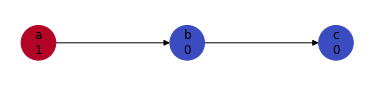

In [2]:
# nodes supplied as a list of tuples of (str, dict) where dict is the attributes for that node
nodes = [('a', {'pos': (0, 0)}), ('b', {'pos': (1, 0)}), ('c', {'pos': (2, 0)})]
# edges are defined as a list of tuples (n1, n2) where (n1, n2) means an edge between node n1 and node n2
edges = [('a', 'b'), ('b', 'c')]
graph = nx.DiGraph()
graph.add_nodes_from(nodes)
graph.add_edges_from(edges)
node_empowerment = graph_node_empowerment(graph, 2)
nx.set_node_attributes(graph, node_empowerment, 'empowerment_2_steps')
# set the figsize on the graph attributes dict
graph.graph['figsize'] = (5,1)
plot_graph_with_measure(graph, 'empowerment_2_steps', arrows=True)

Note that because this is a directed graph, from node a in 2 steps the agent can reach node b or node c so empowerement at node a is log_2(2) = 1. From node b the agent can only reach node c so empowerment is log_2(1) = 0. From node c the agent cannot move at all so empowerment is also 0.


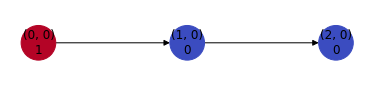

In [3]:
# Alternatively we can use the (x,y) pos also to be the node id, which is how the GridWorld class works.

# NetworkX also allows us to define nodes and edges in one step by passing an Iterable of edges into the constructor.
graph = nx.DiGraph([((0,0), (1,0)), ((1,0), (2,0))])

# Now we must add the 'pos' attributes
nx.set_node_attributes(graph, {n: n for n in graph.nodes}, 'pos')
node_empowerment = graph_node_empowerment(graph, 2)
nx.set_node_attributes(graph, node_empowerment, 'empowerment_2_steps')
# set the figsize on the graph attributes dict
graph.graph['figsize'] = (5,1)
plot_graph_with_measure(graph, 'empowerment_2_steps', arrows=True)

If we connect edges in both directions between each node then the agent can reach 2 other nodes in 2 steps from each node

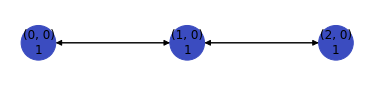

In [4]:
graph = nx.DiGraph([((0,0), (1,0)), ((1,0), (0,0)), ((1,0), (2,0)), ((2,0), (1,0))])

# Now we must add the 'pos' attributes
nx.set_node_attributes(graph, {n: n for n in graph.nodes}, 'pos')
node_empowerment = graph_node_empowerment(graph, 2)
nx.set_node_attributes(graph, node_empowerment, 'empowerment_2_steps')
# set the figsize on the graph attributes dict
graph.graph['figsize'] = (5,1)
plot_graph_with_measure(graph, 'empowerment_2_steps', arrows=True)